# Calibración fotodetectores y filtro neutro continuo

Por: Egdar Rueda, Esteban Marulanda, Jonathan Posada, mayo 2022

## Contenido
1. Primeras pruebas calibración filtro y fotodetectores en longitud de onda de 1064 nm.
2. Calibración en longitud de onda de 633 nm

## 1. Calibración Fotodetectores
Mayo 16, 2022

Verificación de la respuesta lineal de los diferentes fotodetectores. En esta ocasión hemos calibrado el disco filtro-neutro de Edmund Optics 54-082 de forma tal que comenzamos las medidas en el mayor valor de ND.

La información de Edmund Optics:
- Rango ND: 0.04 a 4.0
- Incertidumbre en ND: 8%
- Rango angular: 0° a 310°

### ITM
1. Medidor de potencia: Lightwave OMM-68108.
2. Fotodetector: Lightwave OMH-6722B.

### UdeA
1. Medidor de potencia: Newport 1815-C: en posición 3 mide hasta 2 uA, en posición 4 hasta 20 uA, y en posición 5 hasta 200 uA.
2. Fotodetector: Newport 818-SL s13223 con filtro OD3
3. Fotodetector: Newport 818-SL s13220 con filtro OD3

NOTA: esta vez usamos el filtro interferométrico en la banda 1064 nm, porque el láser deja pasar parte del láser de 980 nm.

COn filtro 406 mW
Sin filtro 476 mW

La máxima potencia ya filtrada es de 406 nm. El único elemento extra entre el láser y el detector es el vidrio (UV Fused Silica) del disco. Por lo que se supone una pérdida debida a las dos reflexiones. Según el fabricante la transmitancia a 164 nm es de 94%, por lo tanto la transmitancia total es de aprox. 88%, y la reflexión total es de 12%. Entonces se espera que de el láser esté saliendo a 1064 nm 455 mW de potencia.

El paso correspondiente a la menor potencia es -21, que se tomará como 0°, P = 159 uW.

In [1]:
import numpy as np 
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
#from sklearn.metrics import r2_score
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

### Datos experimentales
Para el 68108 está en potencia (mW), y para el 1815-C está en corriente ($\mu$A). Los desplazamientos son en pasos del servomotor. Se gira en la dirección antihorario con el paso cero sobre la vertical (arriba).

In [2]:
# 6722B
paso1 = np.array([21,121,221,321,421,521,621,721,821,921,1021,1121,1221,
                  1321,1421,1521,1621,1721,1821,1921,2021]) # paso

w1 = np.array([.159,.243,.392,.616,.915,1.47,2.23,3.38,5.09,7.71,11.63,18.02,27.76,
              42.2,62.9,100.0,170.9,362.0,397.1,398.7,403.5]) # Potencia (mW)

#13223
#Posiciones dial: Pos. 3 hasta 921, Pos. 4 hasta 1421, resto en Pos. 5
paso2 = np.array([21,121,221,321,421,521,621,721,821,921,1021,1121,1221,
                  1321,1421,1521,1621,1721,1821,1921,2021]) # paso

w2 = np.array([0.039, 0.055, 0.091, 0.147, 0.238, 0.364, 0.549, 0.829, 1.24, 1.86, 2.86, 
             4.43, 6.80, 10.1, 14.5, 24.3, 41.1, 88, 98, 97.9, 99]) # potencia uA


#13220
#Posiciones dial: Pos. 3 hasta 921, Pos. 4 hasta 1521, resto en Pos. 5
paso3 = np.array([21,121,221,321,421,521,621,721,821,921,1021,1121,1221,
                  1321,1421,1521,1621,1721,1821,1921,2021]) # paso

w3 = np.array([0.035, 0.05, 0.08, 0.129, 0.210, 0.325, 0.495, 0.745, 1.09, 1.63, 
               2.51, 3.79, 5.96, 8.96, 13.1, 19.2, 36.4, 76.1, 82.2, 82.4, 83.6]) # potencia uA


paso_1 = paso1[0:-1]
w_1 = w1[0:-1]/np.max(w1)
w_1 = np.log10(1/w_1)

paso_2 = paso2[0:-1]
w_2 = w2[0:-1]/np.max(w2)
errA = 4.3/100 # Máximo error reportado por el fabricante
errf=(1/np.log(10))*np.sqrt(2)*errA
print('Error ND según medidor de potencia',errf)
print('Es despreciable')
w_2 = np.log10(1/w_2)

paso_3 = paso3[0:-1]
w_3 = w3[0:-1]/np.max(w3)
w_3 = np.log10(1/w_3)

Error ND según medidor de potencia 0.026409961293969136
Es despreciable


## Expresión esperada
La siguiente expresión es la esperada para el filtro neutro continuo de Edmund Optics 54-082. El filtro tiene película de 0° a 310° en sentido horario. La expresión para la transmitancia es
$$ T = 10^{-ND}$$

$$ ND = m\theta $$


Linearizando la ec. obtenemos:

$$ \log_{10}(1/T) = m\theta $$

### Incertidumbre para el caso del potenciometro 1815-C
Según el fabricante el máximo error relativo de la corriente $\alpha_A/A$ es de 1.7%. Por lo tanto el error en la transmitancia normalizada será:

$$\alpha_T = T \sqrt 2 \ \alpha_A/A $$

Y de la expresión para ND tenemos que la incertudumbre será

$$\alpha_{ND} = \frac{1}{T \ln 10} \alpha_T$$

Luego tenemos que la incertidumbre final será

$$ \alpha_{ND} = \frac{\sqrt 2}{\ln 10} \alpha_A/A $$

Si incluimos el error del fotodetector, reportado para la longitud de onda como de 4%, tendremos que 

$$ \alpha_A/A = \sqrt{0.017^2 + 0.04^2} = 4.3\% $$

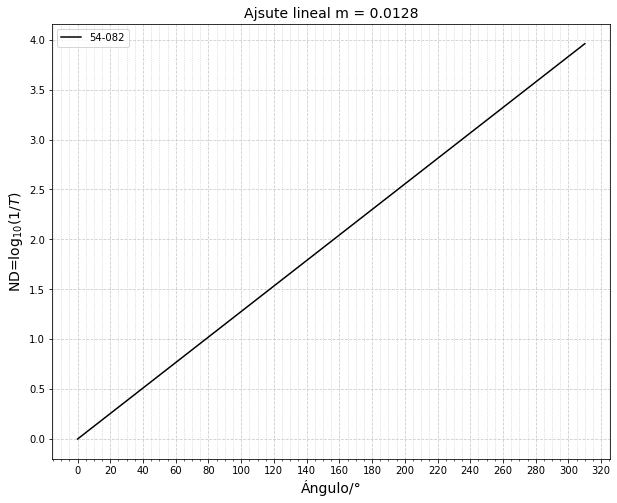

In [3]:
# Función de ajuste lineal
def ajuste(x,  b):
    return b*(x)

# pendiente según fabricante
m = (4.0 - 0.04)/(310 - 0)

# Gráficación de los datos 
fig,ax1 = plt.subplots(figsize = (10,8))
ax1.set_title('Ajsute lineal m = %.4f'%m, fontsize = '14')
ax1.plot(np.linspace(0,310,100),ajuste(np.linspace(0,310,100),m), color = 'k',label='54-082')
ax1.set_xlabel('Ángulo/°', fontsize = '14')
ax1.set_ylabel(r'ND=log$_{10}(1/T)$', fontsize = '14')
ax1.legend()

# Change major ticks to show every 20.
ax1.xaxis.set_major_locator(MultipleLocator(20))
#ax1.yaxis.set_major_locator(MultipleLocator(20))

# Change minor ticks to show every 5. (20/4 = 5)
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax1.grid(which='major', color='#CCCCCC', linestyle='--')
ax1.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.show()

In [4]:
# Para que la función tenga sentido x se tiene que dar en grados.
# Cómo originalmente son pasos se usa la siguiente relación
deltaAng = 360/2051
angM = 21 # paso para mínima potencia, máxima ND
ang1 = 310 - (paso_1-angM)*deltaAng # Conversión de pasos a grados
ang2 = 310 - (paso_2-angM)*deltaAng # Conversión de pasos a grados
ang3 = 310 - (paso_3-angM)*deltaAng # Conversión de pasos a grados

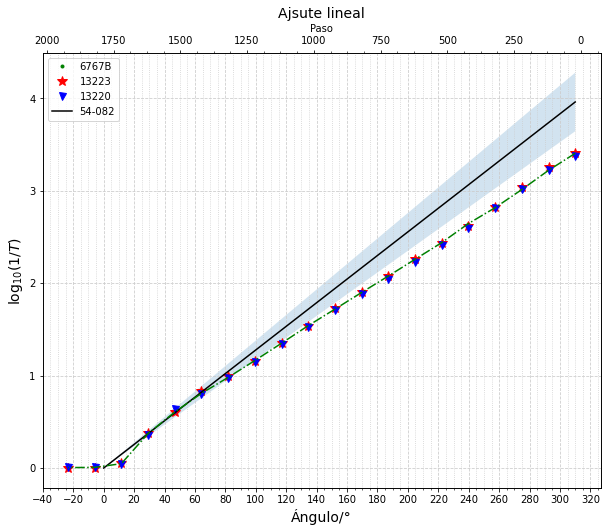

In [5]:
# Gráficación de los datos 
fig,ax1 = plt.subplots(figsize = (10,8))
ax1.set_title('Ajsute lineal', fontsize = '14')
ax1.plot(ang1,w_1, '.', color = 'green',label='6767B')
ax1.plot(ang2,w_2, '*',ms=10, color = 'red',label='13223')
#ax1.errorbar(ang2,w_2,yerr=errf)
ax1.plot(ang3,w_3, 'v',ms=7, color = 'blue',label='13220')
ax1.plot(np.linspace(0,310,100),ajuste(np.linspace(0,310,100),m), color = 'k',label='54-082')
ax1.fill_between(np.linspace(0,310,100),ajuste(np.linspace(0,310,100),m) - 0.08*ajuste(np.linspace(0,310,100),m)
         , ajuste(np.linspace(0,310,100),m) + 0.08*ajuste(np.linspace(0,310,100),m),alpha=0.2)
ax1.set_xlabel('Ángulo/°', fontsize = '14')
ax1.set_ylabel(r'log$_{10}(1/T)$', fontsize = '14')
ax1.legend()
ax2=ax1.twiny()
ax2.plot(paso_1,w_1, '-.', color = 'green',label='13220')
ax2.set_xlabel('Paso')
ax2.invert_xaxis()

# Change major ticks to show every 20.
ax1.xaxis.set_major_locator(MultipleLocator(20))
#ax1.yaxis.set_major_locator(MultipleLocator(20))

# Change minor ticks to show every 5. (20/4 = 5)
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
#ax1.yaxis.set_minor_locator(AutoMinorLocator(4))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax1.grid(which='major', color='#CCCCCC', linestyle='--')
ax1.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.show()

##### Conclusiones:
1. El valor de mínima transmitancia no está bien definido, esto es claro cuando se observa el 54-082, aunque el fabricante dice que si según su relación. El menor valor se da aprox. en el paso 1575.
2. El nuestro solo llega hasta ND 3.5 aproximadamente porque nuestra medida es en 1064 nm, mientras que el del fabricante es en 633 nm. ¡Verificar!
4. Se toman los datos de los fotodetectores como los reales dado que dio igual para los tres. Esto quiere decir que la linealidad del filtro es un poco menor a la reportada por el fabricante.
5. Es claro que para bajos valores de ND el cambio en la película no es lineal. ¿O la respuesta de los fotodetectores no es lineal? Lo más probable es que si sea asunto del filtro porque los fotodetectores de Newport son lineales hasta corrientes de 10 mA, correspondientes a potencias de 10 mW pero con OD3 (3 W reales).

### Determinación de la pendiente $m$ de los detectores
Recordar que según Edumd Optics el  54-082 tiene una pendiente $m=0.0128$.

In [6]:
# Función de ajuste lineal
def ajuste2(x, a,  b):
    return a+b*(x)

# realizar el ajuste
w_2a = w_1[0:-2]
ang2a = ang1[0:-2]
popt2, cov2  = curve_fit(ajuste2, ang2a, w_2a)
w2_ajuste = ajuste2(ang2a, *popt2)
print('La pendiente m encontrada para el 6722B fue %.4f.'%(popt2[1]))

La pendiente m encontrada para el 6722B fue 0.0108.


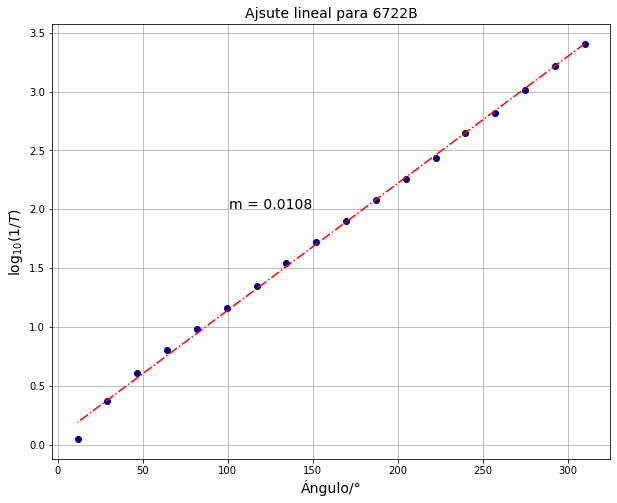

In [7]:
# Gráficación de los datos 
plt.figure(figsize = (10,8))
plt.title('Ajsute lineal para 6722B', fontsize = '14')
plt.plot(ang2a, w_2a, 'o', color = 'darkblue')
plt.plot(ang2a, w2_ajuste, '-.', color = 'red')
plt.xlabel('Ángulo/°', fontsize = '14')
plt.ylabel(r'log$_{10}(1/T)$', fontsize = '14')
plt.text(100.5,2.0,'m = %.4f'%popt2[1],fontsize=14)
plt.grid()
plt.show()

### Gráfica de los valores de potencia medidos con el OHM

El ajuste lineal nos da una pendiente de 0.0108. Intentaremos usar dicho valor para determinar la relación entre potencia y paso. Se harán los ajustes necesarios para obtener el mejor ajuste.

In [8]:
def PotPaso(paso,m,Ang0):
    P0 = 406 # Potencia máxima medida experimentalmente
    #Ang0 = 305 # ángulo correspondiente a la máxima potencia
    ang = Ang0 - (paso-angM)*deltaAng
    return P0*10**(-m*ang)

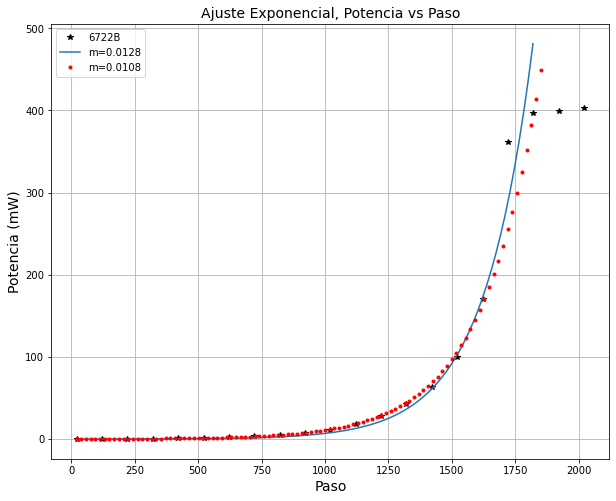

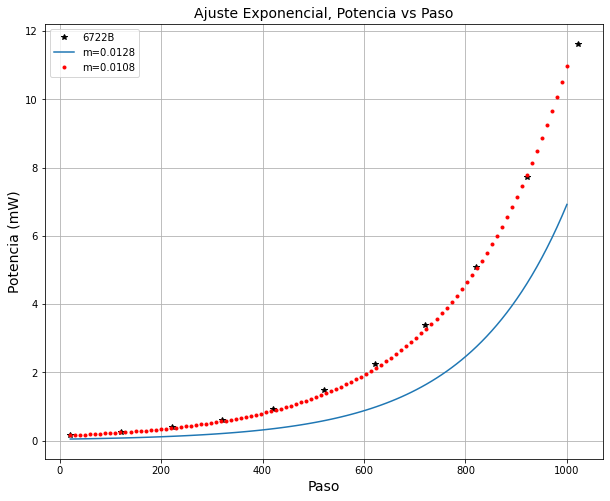

In [9]:
# Gráficación de los datos 
plt.figure(figsize = (10,8))
plt.title('Ajuste Exponencial, Potencia vs Paso', fontsize = '14')
plt.plot(paso1, w1, '*' ,color = 'k',label='6722B')
plt.plot(np.linspace(21,1820,100),PotPaso(np.linspace(21,1820,100),0.0128,310),label='m=0.0128')
plt.plot(np.linspace(21,1850,100),PotPaso(np.linspace(21,1850,100),0.0108,317),'.',color='red',label='m=0.0108')
plt.xlabel('Paso', fontsize = '14')
plt.ylabel('Potencia (mW)', fontsize = '14')
plt.grid()
plt.legend()
plt.show()

# Gráficación de los datos 
plt.figure(figsize = (10,8))
plt.title('Ajuste Exponencial, Potencia vs Paso', fontsize = '14')
plt.plot(paso1[:-10], w1[:-10], '*' ,color = 'k',label='6722B')
plt.plot(np.linspace(21,1000,100),PotPaso(np.linspace(21,1000,100),0.0128,310),label='m=0.0128')
plt.plot(np.linspace(21,1000,100),PotPaso(np.linspace(21,1000,100),0.0108,317),'.',color='red',label='m=0.0108')
plt.xlabel('Paso', fontsize = '14')
plt.ylabel('Potencia (mW)', fontsize = '14')
plt.grid()
plt.legend()
plt.show()

El mejor ajuste se da para la pendiente de 0.0108, y se encuentra que el máximo de potencia se da a partir de 317° (el cero en la vertical midiendo en sentido antihorario). La ecuación que se usará en el laboratorio para determinar la potencia será:

$$ \theta = 317 - (paso - 21)\times 360/2051$$
$$P = P_0 10^{-m\theta}$$

con $m = 0.0108$ y $P_0 = 406$ mW.

El valor máximo de potencia sugerido será $100$ mW.

La diferencia en la pendiente entre el ajuste lineal y el de potencias de diez es seguramente debido al punto de mayor potencia.

## Calibración detectores para medir en potencia

### 13223

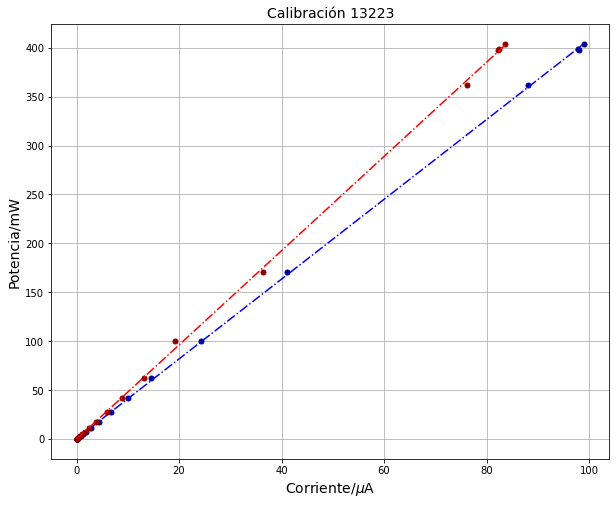

13223: Razón W/A = 4.1e+03
13220: Razón W/A = 4.8e+03

Responsitividades:
13223: Razón A/W = 2.5e-04
13220: Razón W/A = 2.1e-04


In [10]:
def flinea(x,m,b):
    return m*x+b

popt5, pcov5 = curve_fit(flinea,w2,w1)
popt6, pcov6 = curve_fit(flinea,w3,w1)


# Gráficación de los datos 
plt.figure(figsize = (10,8))
plt.title('Calibración 13223', fontsize = '14')
plt.plot(w2,w1, '.',ms=10, color = 'darkblue',label='13223')
plt.plot(w2,flinea(w2,*popt5),'-.',color='blue')
plt.plot(w3,w1, '.',ms=10, color = 'darkred',label='13220')
plt.plot(w3,flinea(w3,*popt6),'-.',color='red')
plt.xlabel('Corriente/$\mu$A', fontsize = '14')
plt.ylabel(r'Potencia/mW', fontsize = '14')
plt.grid()
plt.show()

print('13223: Razón W/A = %.1e'%(popt5[0]*1e3))
print('13220: Razón W/A = %.1e'%(popt6[0]*1e3))

print('\nResponsitividades:')
print('13223: Razón A/W = %.1e'%(1/popt5[0]*1e-3))
print('13220: Razón W/A = %.1e'%(1/popt6[0]*1e-3))

#### Fotodetector: Newport 818-SL s13223 con filtro OD3


In [11]:
paso2 = np.array([21,121,221,321,421,521,621,721,821,921,1021,1121,1221,
                  1321,1421,1521,1621,1721,1821,1921,2021]) # paso

i = np.array([0.039, 0.055, 0.091, 0.147, 0.238, 0.364, 0.549, 0.829, 1.24, 1.86, 2.86, 
             4.43, 6.80, 10.1, 14.5, 24.3, 41.1, 88, 98, 97.9, 99]) # potencia uA

#### Fotodetector: Newport 818-SL s13220 con filtro OD3 

In [12]:
paso2 = np.array([21,121,221,321,421,521,621,721,821,921,1021,1121,1221,
                  1321,1421,1521,1621,1721,1821,1921,2021]) # paso

i_2 = np.array([0.035, 0.05, 0.08, 0.129, 0.210, 0.325, 0.495, 0.745, 1.09, 1.63, 
               2.51, 3.79, 5.96, 8.96, 13.1, 19.2, 36.4, 76.1, 82.2, 82.4, 83.6]) # potencia uA

## 2. Calibración en longitud de onda de 633 nm

### Fotodetector 6722B

La pendiente m encontrada para el 6722B fue 0.0124.
Diferencia de 3.2 %


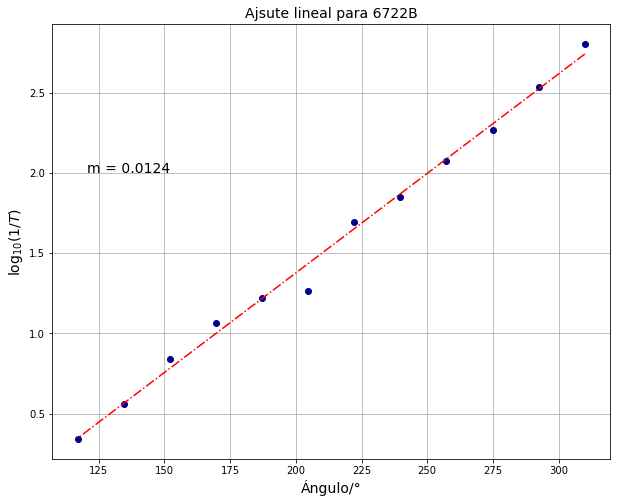

In [13]:
paso1 = np.array([46, 146, 246, 346, 446, 546, 646, 746, 846, 946, 1046, 1146, 1246, 1346, 1446])

w1 = np.array([0.016, 0.0296, 0.0552, 0.0856, 0.145, 0.205,0.555,  0.615, 0.873, 1.48, 
              2.80, 4.64, 7.56, 10, 10.2]) # potencia mW 

paso_1 = paso1[0:-1]
w_1 = w1[0:-1]/np.max(w1)
w_1 = np.log10(1/w_1)

# Para que la función tenga sentido x se tiene que dar en grados.
# Cómo originalmente son pasos se usa la siguiente relación
deltaAng = 360/2051
angM = 46 # paso para mínima potencia, máxima ND
ang1 = 310 - (paso_1-angM)*deltaAng # Conversión de pasos a grados

# realizar el ajuste
w_2a = w_1[0:-2]
ang2a = ang1[0:-2]
popt2, cov2  = curve_fit(ajuste2, ang2a, w_2a)
w2_ajuste = ajuste2(ang2a, *popt2)
print('La pendiente m encontrada para el 6722B fue %.4f.'%(popt2[1]))
print('Diferencia de %.1f %%'%(100*abs(popt2[1]-0.0128)/0.0128))

# Gráficación de los datos 
plt.figure(figsize = (10,8))
plt.title('Ajsute lineal para 6722B', fontsize = '14')
plt.plot(ang2a, w_2a, 'o', color = 'darkblue')
plt.plot(ang2a, w2_ajuste, '-.', color = 'red')
plt.xlabel('Ángulo/°', fontsize = '14')
plt.ylabel(r'log$_{10}(1/T)$', fontsize = '14')
plt.text(120.5,2.0,'m = %.4f'%popt2[1],fontsize=14)
plt.grid()
plt.show()

**Conclusión**: Cómo era de esperarse esta pendiente se aproxima mucho más a la pendiente reportada por el fabricante.

### Fotodetector 818-SL s13220 con OD3
Nota:  Medidas tomadas en la posición 3, en $1.24$ $uA$ (paso 1146) se satura y se cambia a la posición 4. 

La pendiente m encontrada para el 6722B fue 0.0137.
Diferencia de 6.7 %


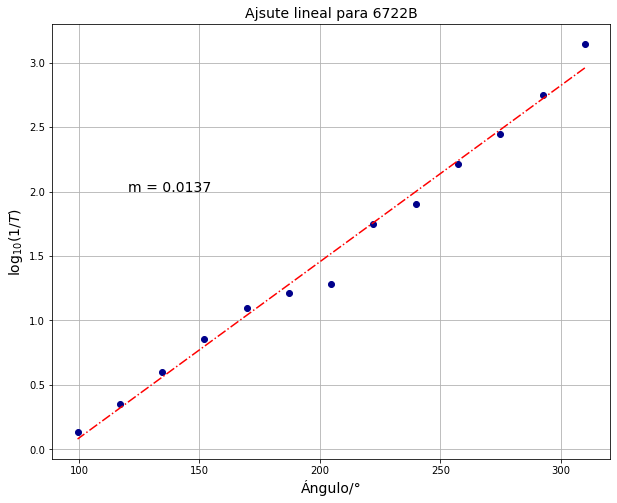

In [14]:
paso2 = np.array([46, 146, 246, 346, 446, 546, 646, 746, 846, 946, 1046, 1146, 1246, 1346, 1446,
                 1546])

w2 = np.array([0.002, 0.005, 0.010, 0.017, 0.035, 0.05, 0.145, 0.170, 0.226, 0.387, 0.705, 1.24,
              2.04, 2.70, 2.80, 2.68]) #corriente uA


paso_2 = paso2[0:-1]
w_2 = w2[0:-1]/np.max(w2)
w_2 = np.log10(1/w_2)
ang2 = 270 - (paso_2-angM)*deltaAng # Conversión de pasos a grados

# Para que la función tenga sentido x se tiene que dar en grados.
# Cómo originalmente son pasos se usa la siguiente relación
deltaAng = 360/2051
angM = 46 # paso para mínima potencia, máxima ND
ang2 = 310 - (paso_2-angM)*deltaAng # Conversión de pasos a grados

# realizar el ajuste
w_2a = w_2[0:-2]
ang2a = ang2[0:-2]
popt2, cov2  = curve_fit(ajuste2, ang2a, w_2a)
w2_ajuste = ajuste2(ang2a, *popt2)
print('La pendiente m encontrada para el 6722B fue %.4f.'%(popt2[1]))
print('Diferencia de %.1f %%'%(100*abs(popt2[1]-0.0128)/0.0128))

# Gráficación de los datos 
plt.figure(figsize = (10,8))
plt.title('Ajsute lineal para 6722B', fontsize = '14')
plt.plot(ang2a, w_2a, 'o', color = 'darkblue')
plt.plot(ang2a, w2_ajuste, '-.', color = 'red')
plt.xlabel('Ángulo/°', fontsize = '14')
plt.ylabel(r'log$_{10}(1/T)$', fontsize = '14')
plt.text(120.5,2.0,'m = %.4f'%popt2[1],fontsize=14)
plt.grid()
plt.show()